#Initialization functions#

This notebook is designed to explore the different initialization functions in a fully connected neural network.

A well-chosen initialization is important because it can

  - speed up the convergence optimization algorithm.

  - improve convergence to achieve a lower training error.

# Import nessessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from tensorflow import keras
#from keras import optimizers

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 1].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)
    plt.show()

def load_dataset():
    np.random.seed(1)
    X_train, y_train = sklearn.datasets.make_circles(n_samples = 300, noise = .05)
    np.random.seed(2)
    X_test, y_test = sklearn.datasets.make_circles(n_samples = 100, noise = .05)
    
    # Visualize the data
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 40, cmap = plt.cm.Spectral);
    
    return X_train, y_train, X_test, y_test

# Data 

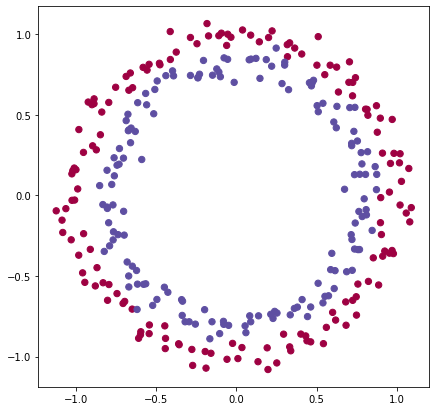

In [ ]:
# load image dataset: blue/red dots in circles
X_train, y_train, X_test, y_test = load_dataset()

# Build ANNs with different initialization methods

##Activity 1: You are expected to complete function `model` below.

In [ ]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, initialization = "he"):
    """
    Implements a four-layer neural network: input layer -> first hidden layer -> second hidden layer -> output layer
    
    First hidden layer: 10 neuros, ReLu
    Second hidden layer: 5 neuros, ReLu
    Output layer: 1 neuron, Sigmoid

    Arguments:
    X -- input data
    Y -- true "label" vector
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    model -- learnt model
    """
        
    m = X.shape[1] # number of features
    n = X.shape[0] # number of samples
    
    model = Sequential()
    
    # Build your model
    if initialization == "zeros":
        # first hidden layer
        layer = Dense(
            units = 10,
            input_dim = m,
            activation = "relu",
            kernel_initializer = initializers.Zeros(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # second hidden layer
        layer = Dense(
            units = 5,
            activation = "relu",
            kernel_initializer = initializers.Zeros(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # output layer
        layer = Dense(
            units = 1,
            activation = "sigmoid",
            kernel_initializer = initializers.Zeros(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
    elif initialization == "random":
        # first hidden layer
        layer = Dense(
            units = 10,
            input_dim = m,
            activation = "relu",
            kernel_initializer = initializers.RandomNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # second hidden layer
        layer = Dense(
            units = 5,
            activation = "relu",
            kernel_initializer = initializers.RandomNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # output layer
        layer = Dense(
            units = 1,
            activation = "sigmoid",
            kernel_initializer = initializers.RandomNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)          
        
    elif initialization == "he":
        # first hidden layer
        layer = Dense(
            units = 10,
            input_dim = m,
            activation = "relu",
            kernel_initializer = initializers.HeNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # second hidden layer
        layer = Dense(
            units = 5,
            activation = "relu",
            kernel_initializer = initializers.HeNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        # output layer
        layer = Dense(
            units = 1,
            activation = "sigmoid",
            kernel_initializer = initializers.HeNormal(),
            bias_initializer = initializers.Zeros()
        )
        model.add(layer)
        
        
    # Compile the model
    opt = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(optimizer = opt, 
                  loss = "binary_crossentropy", 
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train,
                        epochs = num_iterations,
                        batch_size = n,
                        verbose = 0)
    
               
    # plot the loss using history callback
    plt.plot(history.history['loss'], label='Training set')
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return model

##Activity 2: 
 - Plot the loss as a function of number of iterations for "zero" case
 - Plot the boundary by calling `plot_decision_boundary(model, X_train, y_train)`
 - Display the accuracies on the training set and test set. 

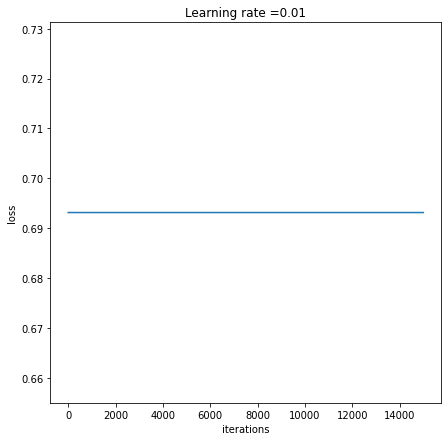

In [ ]:
zero_model = model(X_train, y_train, learning_rate = 0.01, num_iterations = 15000, initialization = "zeros")

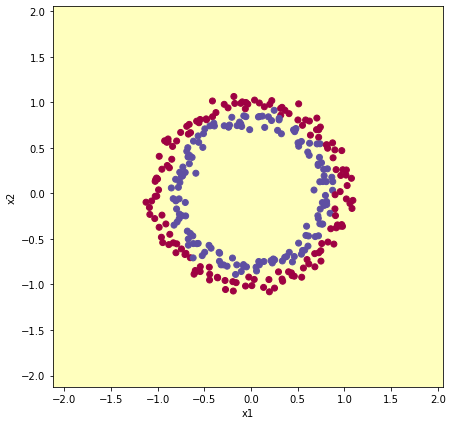

In [ ]:
plot_decision_boundary(zero_model, X_train, y_train)

In [ ]:
print("Accuray on training set = ", zero_model.evaluate(X_train, y_train)[1])
print("Accuray on test set = ", zero_model.evaluate(X_test, y_test)[1])

10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Accuray on training set =  0.5
4/4 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Accuray on test set =  0.5


##Activity 3: 
 - Plot the loss as a function of number of iterations for "random" case
 - Plot the boundary by calling `plot_decision_boundary(model, X_train, y_train)`
 - Display the accuracies on the training set and test set. 

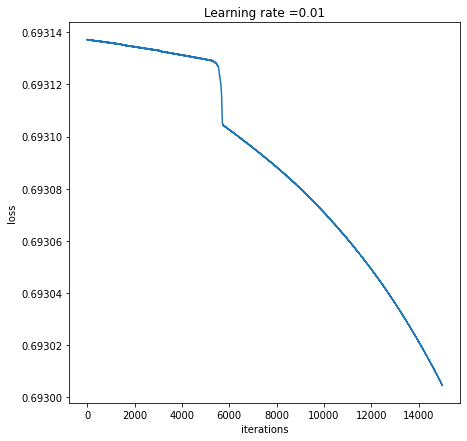

In [ ]:
random_model = model(X_train, y_train, learning_rate = 0.01, num_iterations = 15000, initialization = "random")#
#zero_model = model(X_train, y_train, learning_rate = 0.01, num_iterations = 15000, initialization = "zeros")

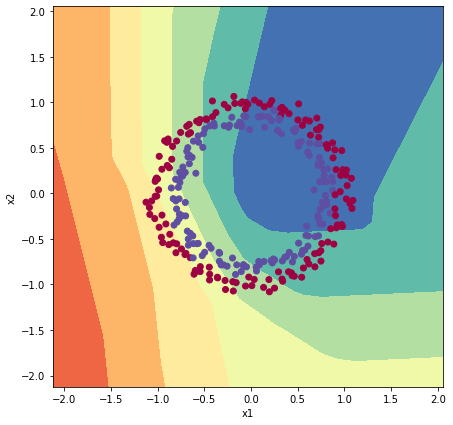

In [ ]:
plot_decision_boundary(random_model, X_train, y_train)

In [ ]:
print("Accuray on training set = ", random_model.evaluate(X_train, y_train)[1])
print("Accuray on test set = ", random_model.evaluate(X_test, y_test)[1])

10/10 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5233
Accuray on training set =  0.5233333110809326
4/4 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Accuray on test set =  0.5099999904632568


##Activity 4: 
 - Plot the loss as a function of number of iterations for "he" case
 - Plot the boundary by calling `plot_decision_boundary(model, X_train, y_train)`
 - Display the accuracies on the training set and test set. 

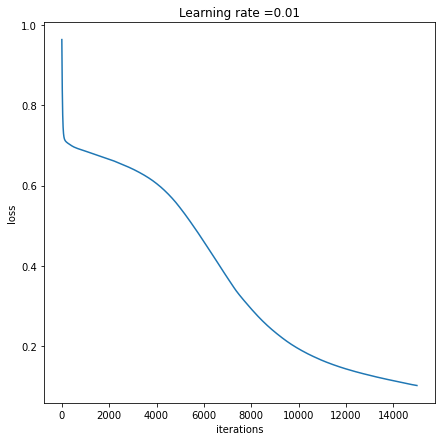

In [ ]:
he_model = model(X_train, y_train, learning_rate = 0.01, num_iterations = 15000, initialization = "he")

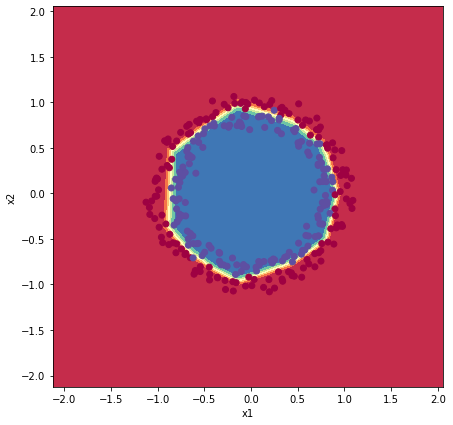

In [ ]:
plot_decision_boundary(he_model, X_train, y_train)

In [ ]:
print("Accuray on training set = ", he_model.evaluate(X_train, y_train)[1])
print("Accuray on test set = ", he_model.evaluate(X_test, y_test)[1])

10/10 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9800
Accuray on training set =  0.9800000190734863
4/4 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9700
Accuray on test set =  0.9700000286102295
